In [1]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#load and split the data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#normalizing pixel values
x_train,x_test=x_train/255.0,x_test/255.0

In [4]:
#define the model
model=keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
#training
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8575 - loss: 0.4856 - val_accuracy: 0.9597 - val_loss: 0.1379
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9545 - loss: 0.1516 - val_accuracy: 0.9704 - val_loss: 0.0981
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9656 - loss: 0.1139 - val_accuracy: 0.9714 - val_loss: 0.0903
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9736 - loss: 0.0896 - val_accuracy: 0.9754 - val_loss: 0.0753
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9770 - loss: 0.0739 - val_accuracy: 0.9786 - val_loss: 0.0712
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9799 - loss: 0.0638 - val_accuracy: 0.9788 - val_loss: 0.0735
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9814 - loss: 0.0576 - val_accuracy: 0.9799 - val_loss: 0.0691
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9835 - loss: 0.050

In [7]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9818 - loss: 0.0786


In [8]:
print("test accuracy:",test_acc)
print("test loss:",test_loss)

test accuracy: 0.9818000197410583
test loss: 0.07856566458940506


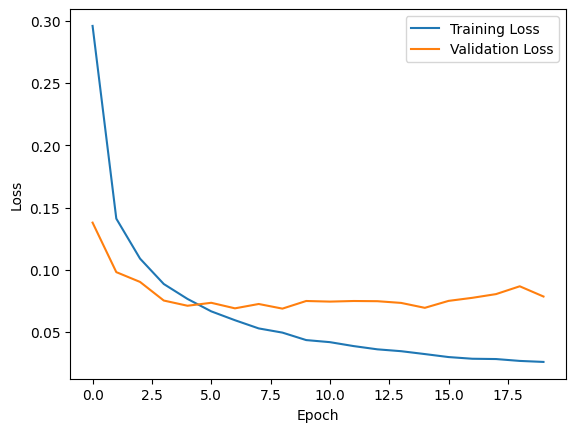

In [9]:
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()